In [1]:
#dependencies
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
sns.set_palette("pastel")

data = pd.read_csv('../../data/train_month_3_with_target.csv',parse_dates = [29,30,32])

# cast types 
cols_binary = ['homebanking_active', 'has_homebanking',
       'has_insurance_21', 'has_insurance_23', 'has_life_insurance_fixed_cap',
       'has_life_insurance_decreasing_cap', 'has_fire_car_other_insurance',
       'has_personal_loan', 'has_mortgage_loan', 'has_current_account',
       'has_pension_saving', 'has_savings_account',
       'has_savings_account_starter', 'has_current_account_starter','customer_self_employed']

data[cols_binary] = data[cols_binary].astype('bool')
data['target'] = data['target'].astype('bool')

cols_object = ['customer_occupation_code', 'customer_postal_code', 'customer_education', 'customer_children',
       'customer_relationship','customer_gender']

data[cols_object] = data[cols_object].astype('object')


# Date to years value conversion 
data['customer_since_all_years'] = (2018-data.customer_since_all.dt.year)
data['customer_since_bank_years'] = (2018-data.customer_since_bank.dt.year)
data['customer_age'] = (2018-data.customer_birth_date.dt.year)

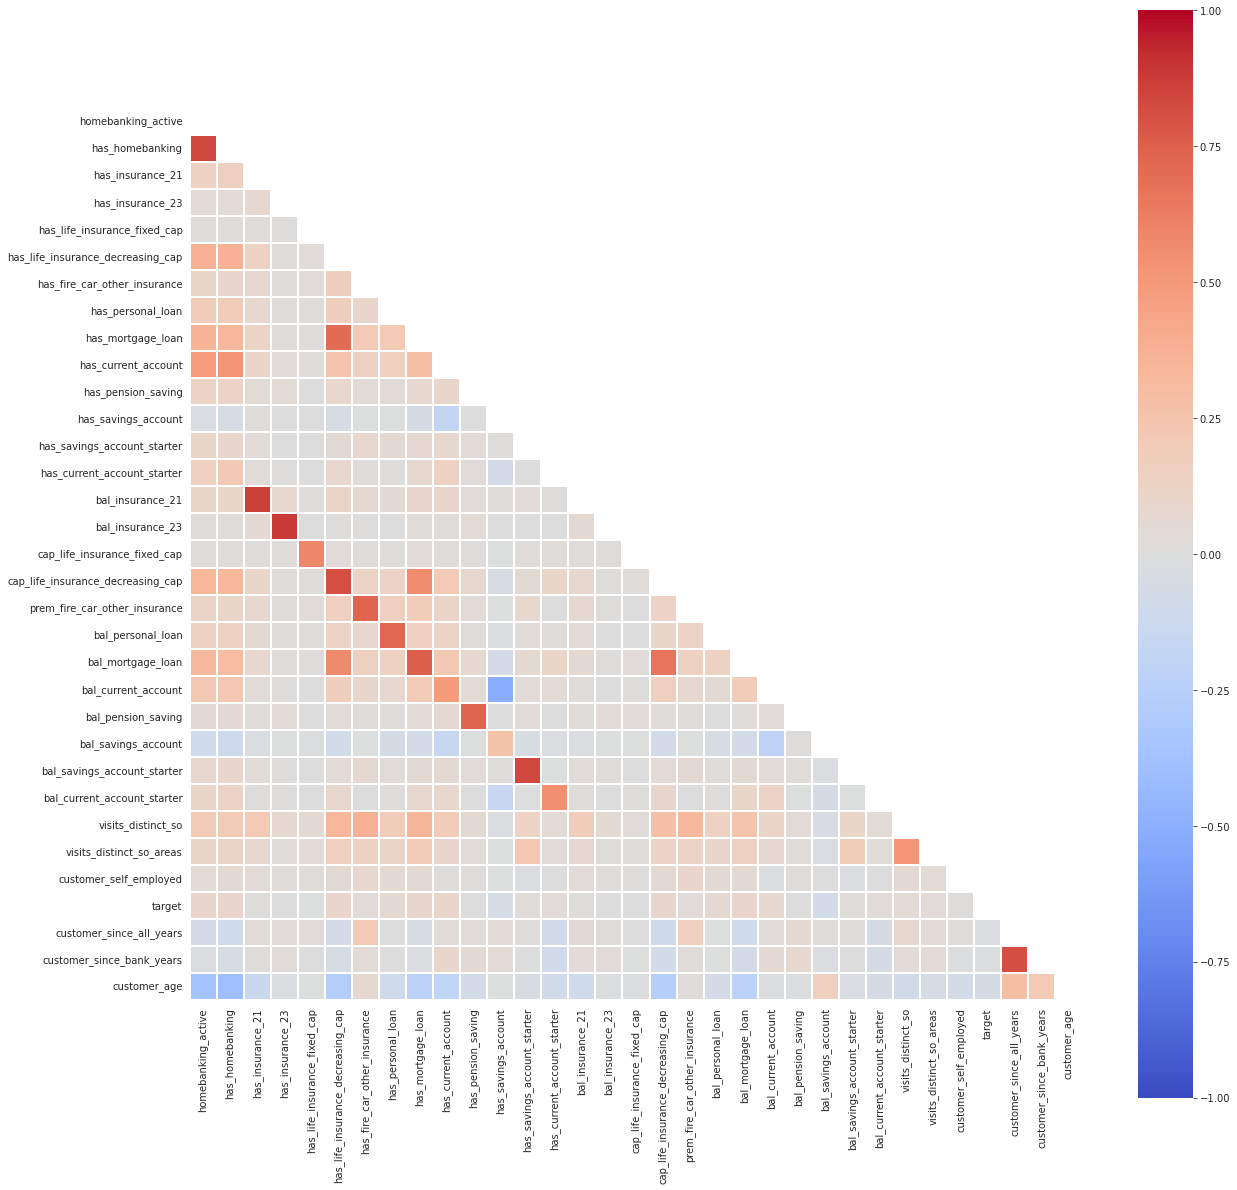

In [2]:
corrs = data.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corrs
                     , mask=mask
                     , square=True
                     , vmin = -1
                     , vmax = 1
                     , center = 0
                     , cmap="coolwarm"
                     , linewidth = 0.1
#                      , robust = True
                    )

In [3]:
target_corrs = abs(corrs.target).sort_values(ascending = False)
print("-"*50)
print('correlations with target')
print("-"*50)
print(target_corrs)

--------------------------------------------------
correlations with target
--------------------------------------------------
target                               1.000000
homebanking_active                   0.101469
has_homebanking                      0.098962
bal_mortgage_loan                    0.096654
has_life_insurance_decreasing_cap    0.094047
has_mortgage_loan                    0.093194
has_current_account                  0.093078
cap_life_insurance_decreasing_cap    0.086488
bal_savings_account                  0.071638
bal_current_account                  0.062886
has_personal_loan                    0.061892
bal_personal_loan                    0.059351
customer_age                         0.059206
has_savings_account                  0.048442
visits_distinct_so                   0.042301
visits_distinct_so_areas             0.026775
prem_fire_car_other_insurance        0.026698
has_fire_car_other_insurance         0.025787
bal_current_account_starter          0.025302

In [4]:
def find_collinearity(data,threshold =0.7):
    corrs = data.corr()
    
    # buil list
    df = (corrs[(abs(corrs)>threshold) & (corrs != 1 )])
    l = []
    df_na = df.isna()         
    for row in range(df.shape[0]):
        for col in range(row+1,df.shape[1]):
            if df_na.iloc[row,col] == False:
                l.append((df.index[row],df.columns[col],df.iloc[row,col]))

    l.sort(key=lambda tup: tup[2],reverse =True)
    for i in l:
        print(i)
    
    return l
    
colinear_vars = find_collinearity(data)

('has_insurance_23', 'bal_insurance_23', 0.8809757682838544)
('has_insurance_21', 'bal_insurance_21', 0.8607111637902847)
('has_savings_account_starter', 'bal_savings_account_starter', 0.8365734642895831)
('homebanking_active', 'has_homebanking', 0.836033822763644)
('customer_since_all_years', 'customer_since_bank_years', 0.8190303544519462)
('has_life_insurance_decreasing_cap', 'cap_life_insurance_decreasing_cap', 0.8104066074657014)
('has_mortgage_loan', 'bal_mortgage_loan', 0.7570115926797555)
('has_fire_car_other_insurance', 'prem_fire_car_other_insurance', 0.7296349752685147)
('has_pension_saving', 'bal_pension_saving', 0.7278206796956318)
('has_personal_loan', 'bal_personal_loan', 0.7253715198367517)


In [5]:
print('cols to drop due to high colinearity and low correlation with target')
l = []
for tup in colinear_vars:
    if target_corrs.loc[tup[0]] > target_corrs.loc[tup[1]]:
        l.append(tup[1])        
    else:
        l.append(tup[0])
l    

cols to drop due to high colinearity and low correlation with target


['bal_insurance_23',
 'bal_insurance_21',
 'bal_savings_account_starter',
 'has_homebanking',
 'customer_since_bank_years',
 'cap_life_insurance_decreasing_cap',
 'has_mortgage_loan',
 'has_fire_car_other_insurance',
 'bal_pension_saving',
 'bal_personal_loan']

In [6]:
print('-'*65)
print('are missing value correlated with target?')
print('-'*65)
check_corr = ['customer_education','customer_children','customer_relationship','customer_occupation_code','customer_since_bank']
for var in check_corr:
    print('%s:\t%f' % (var,data[var].isna().corr(data.target) ))

-----------------------------------------------------------------
are missing value correlated with target?
-----------------------------------------------------------------
customer_education:	-0.109084
customer_children:	-0.005475
customer_relationship:	-0.000317
customer_occupation_code:	0.008896
customer_since_bank:	0.009614


In [7]:
print('-'*65)
print('is age correlated with other features?')
print('-'*65)
print(abs(data.corr().customer_age).sort_values(ascending = False).head(10))

-----------------------------------------------------------------
is age correlated with other features?
-----------------------------------------------------------------
customer_age                         1.000000
has_homebanking                      0.405673
homebanking_active                   0.365088
customer_since_all_years             0.295172
has_life_insurance_decreasing_cap    0.270308
cap_life_insurance_decreasing_cap    0.262327
has_mortgage_loan                    0.224595
bal_mortgage_loan                    0.223849
customer_since_bank_years            0.208135
has_current_account                  0.202742
Name: customer_age, dtype: float64
